In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sci
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import folium
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Hotel_Reviews.csv



# **About the Dataset**
The data was scraped from **Booking.com**. All data in the file is publicly available to everyone already. Data is originally owned by **Booking.com**.

In [2]:
#loading the dataset from the Hotel_reviews dataset
df = pd.read_csv("../input/Hotel_Reviews.csv")

# **Data Analysis**

In [3]:
#printing the columns names of the datset
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [4]:
#printing the shape of the dataset
df.shape

(515738, 17)

In [5]:
print ('Number of data points : ', df.shape[0], \
       '\nNumber of features:', df.shape[1])
df.head()

Number of data points :  515738 
Number of features: 17


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


This dataset contains **515,000  customer reviews** and scoring of **1493  Luxury Hotels** across Europe.

The csv file contains 17 fields. The description of each field is as below:

* **Hotel_Address**: Address of hotel.
* **Review_Date**: Date when reviewer posted the corresponding review.
* **Average_Score**: Average Score of the hotel, calculated based on the latest comment in the last year.
* **Hotel_Name**: Name of Hotel
* **Reviewer_Nationality**: Nationality of Reviewer
* **Negative_Review**: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
* **Review_Total_Negative_Word_Counts**: Total number of words in the negative review.
* **Positive_Review**: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
* **Review_Total_Positive_Word_Counts**: Total number of words in the positive review.
* **Reviewer_Score**: Score the reviewer has given to the hotel, based on his/her experience
* **Total_Number_of_Reviews_Reviewer_Has_Given**: Number of Reviews the reviewers has given in the past.
* **Total_Number_of_Reviews**: Total number of valid reviews the hotel has.
* **Tags**: Tags reviewer gave the hotel.
* **days_since_review**: Duration between the review date and scrape date.
* **Additional_Number_of_Scoring**: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
* **lat**: Latitude of the hotel
* **lng**: longtitude of the hotel


Meanwhile, the geographical location of hotels are also provided for further analysis.

** Basic stats for the feature: Hotel_Name**

In [6]:
df.Hotel_Name.describe()

count                                         515738
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

There are **1492** Hotel Names and the most reviewed Hotel is **Britannia International Hotel Canary Wharf** with **4789** reviews.

In [7]:
# Let's look at the top 10 reviewed Hotels with their frequency
Hotel_Name_count = Counter(list(df.Hotel_Name))
Hotel_Name_count.most_common(10)

[('Britannia International Hotel Canary Wharf', 4789),
 ('Strand Palace Hotel', 4256),
 ('Park Plaza Westminster Bridge London', 4169),
 ('Copthorne Tara Hotel London Kensington', 3578),
 ('DoubleTree by Hilton Hotel London Tower of London', 3212),
 ('Grand Royale London Hyde Park', 2958),
 ('Holiday Inn London Kensington', 2768),
 ('Hilton London Metropole', 2628),
 ('Millennium Gloucester Hotel London', 2565),
 ('Intercontinental London The O2', 2551)]

**Basic stats for the feature: Review_Date**

In [8]:
df.Reviewer_Nationality.describe()

count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: Reviewer_Nationality, dtype: object

![](http://)The Reviewers belongs to **227** different countries and almost  **47.55%(245246/515738)** of Reviewers are from **United Kingdom**

In [9]:
# Let's look at the Top 10 Reviewer's Nationalities
Reviewer_Nat_Count = Counter(list(df.Reviewer_Nationality))
Reviewer_Nat_Count.most_common(10)

[(' United Kingdom ', 245246),
 (' United States of America ', 35437),
 (' Australia ', 21686),
 (' Ireland ', 14827),
 (' United Arab Emirates ', 10235),
 (' Saudi Arabia ', 8951),
 (' Netherlands ', 8772),
 (' Switzerland ', 8678),
 (' Germany ', 7941),
 (' Canada ', 7894)]

**Basic stats for the feature: Review_Date**

In [10]:
df.Review_Date.describe()

count       515738
unique         731
top       8/2/2017
freq          2585
Name: Review_Date, dtype: object

1. There Reviews are given in **731** different **dates** and the most Reviews are given on **8/2/2017**

In [11]:
# Let's look at the top 10 Reviews given dates
Review_Date_count = Counter(list(df.Review_Date))
Review_Date_count.most_common(10)

[('8/2/2017', 2585),
 ('9/15/2016', 2308),
 ('4/5/2017', 2284),
 ('8/30/2016', 1963),
 ('2/16/2016', 1940),
 ('7/5/2016', 1904),
 ('5/31/2016', 1860),
 ('12/5/2016', 1803),
 ('7/12/2016', 1801),
 ('8/2/2016', 1783)]

### **Checking whether there are any missing values in the dataset.**

In [12]:
import missingno as msno

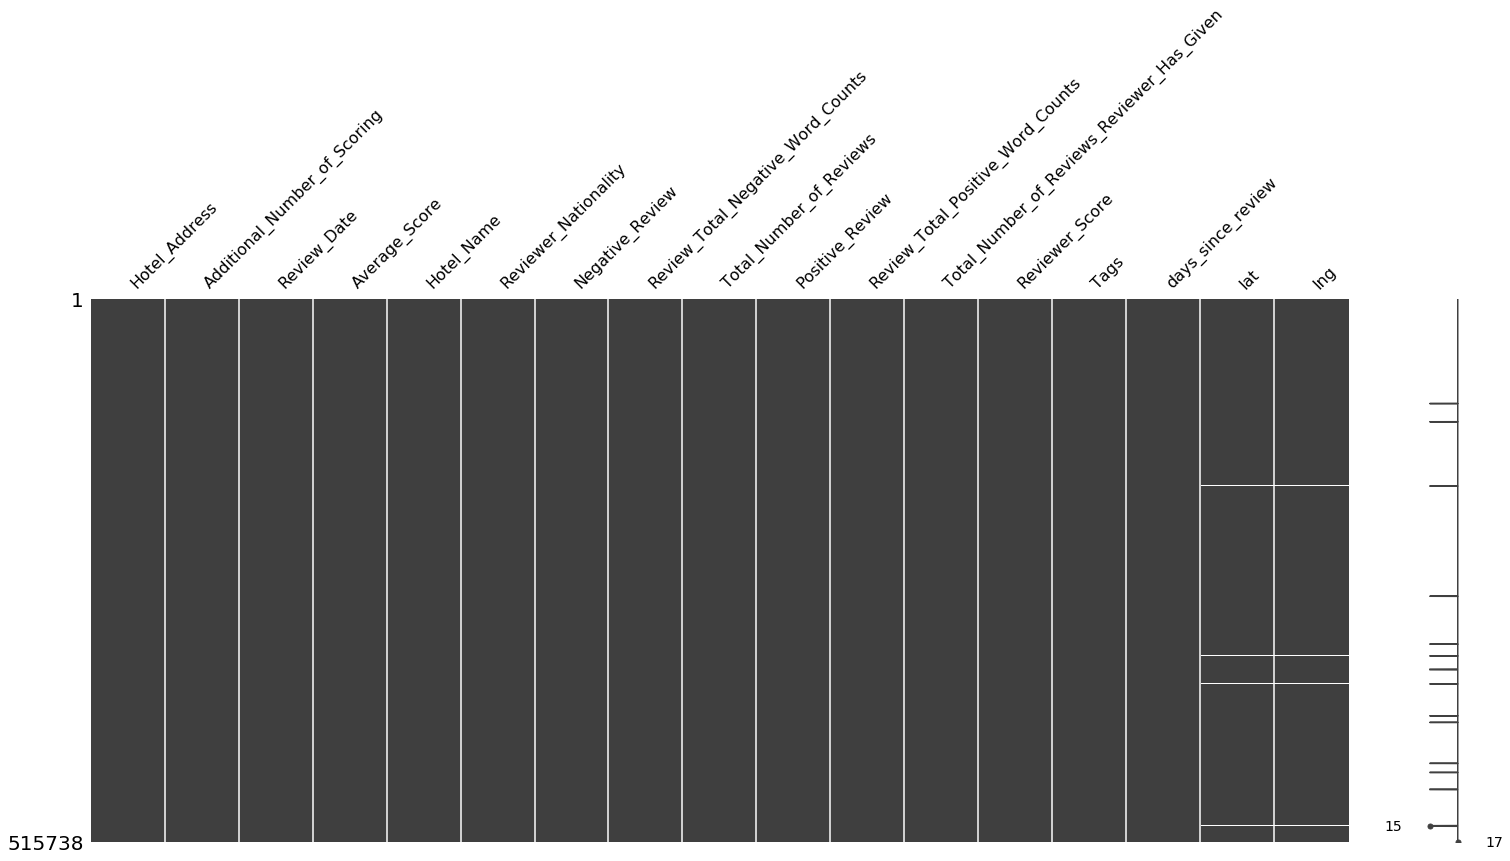

In [13]:
msno.matrix(df)

*  ### From the above plot we can see that there are some missing values in  **lat**(Latitude) and **lng**(Longitude) features  in the dataset. 
* ### Lets look at the missing values in the dataset.

In [14]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans_df = nans(df)

In [15]:
nans_df = nans_df[['Hotel_Name','lat','lng']]
print('No of missing values in the dataset are: {}'.format(len(nans_df)))
len(nans_df)

No of missing values in the dataset are: 3268


3268

In [16]:
nans_df.Hotel_Name.describe()

count                                    3268
unique                                     17
top       Fleming s Selection Hotel Wien City
freq                                      658
Name: Hotel_Name, dtype: object

* We see that there are about **3268  Nan** (missing values) in the dataset. 


In [17]:
# counting no of Hotels information is missing
Hotel_Name_count = Counter(list(nans_df.Hotel_Name))
len(Hotel_Name_count)

17

* we can see that that only  **17**  Hotels **lat,lng** information is not available in the dataset.
i.e., **1.13%** of **Hotels** lat,lng information is missing.

In [18]:
# let's look at the reviews frequency of that Hotels. 
Hotel_Name_count.most_common()

[('Fleming s Selection Hotel Wien City', 658),
 ('Hotel City Central', 563),
 ('Hotel Atlanta', 389),
 ('Maison Albar Hotel Paris Op ra Diamond', 290),
 ('Hotel Daniel Vienna', 245),
 ('Hotel Pension Baron am Schottentor', 223),
 ('Austria Trend Hotel Schloss Wilhelminenberg Wien', 194),
 ('Derag Livinghotel Kaiser Franz Joseph Vienna', 147),
 ('NH Collection Barcelona Podium', 146),
 ('City Hotel Deutschmeister', 93),
 ('Hotel Park Villa', 61),
 ('Cordial Theaterhotel Wien', 57),
 ('Holiday Inn Paris Montmartre', 55),
 ('Roomz Vienna', 49),
 ('Mercure Paris Gare Montparnasse', 37),
 ('Renaissance Barcelona Hotel', 33),
 ('Hotel Advance', 28)]

* Instead of removing the **Nan** values from the dataset,
Try to fill the **Nan** values with the similar **Hotel_Addresses *lat, lng* values**  in the dataset. 
If the **Hotel_Address** is matched with the other rows(i.e Nan valued rows) in the dataset, Fill the **Nan** values in the dataset with the matched values(i.e., **lat**,**lng**).
* Let's look into the datset to find the similar Hotel information is availble.

In [19]:
print('No of reviews in the dataset for particular Hotel:')
print('Fleming s Selection Hotel Wien City: {}'.format(len(df.loc[df.Hotel_Name == 'Fleming s Selection Hotel Wien City'])))
print('Hotel City Central: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel City Central'])))
print('Hotel Atlanta: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Atlanta'])))
print('Maison Albar Hotel Paris Op ra Diamond: {}'.format(len(df.loc[df.Hotel_Name == 'Maison Albar Hotel Paris Op ra Diamond'])))
print('Hotel Daniel Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Daniel Vienna'])))
print('Hotel Pension Baron am Schottentor: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Pension Baron am Schottentor'])))
print('Austria Trend Hotel Schloss Wilhelminenberg Wien: {}'.format(len(df.loc[df.Hotel_Name == 'Austria Trend Hotel Schloss Wilhelminenberg Wien'])))
print('Derag Livinghotel Kaiser Franz Joseph Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Derag Livinghotel Kaiser Franz Joseph Vienna'])))
print('NH Collection Barcelona Podium: {}'.format(len(df.loc[df.Hotel_Name == 'NH Collection Barcelona Podium'])))
print('City Hotel Deutschmeister: {}'.format(len(df.loc[df.Hotel_Name == 'City Hotel Deutschmeister'])))
print('Hotel Park Villa: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Park Villa'])))
print('Cordial Theaterhotel Wien: {}'.format(len(df.loc[df.Hotel_Name == 'Cordial Theaterhotel Wien'])))
print('Holiday Inn Paris Montmartre: {}'.format(len(df.loc[df.Hotel_Name == 'Holiday Inn Paris Montmartre'])))
print('Roomz Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Roomz Vienna'])))
print('Mercure Paris Gare Montparnasse: {}'.format(len(df.loc[df.Hotel_Name == 'Mercure Paris Gare Montparnasse'])))
print('Renaissance Barcelona Hotel: {}'.format(len(df.loc[df.Hotel_Name == 'Renaissance Barcelona Hotel'])))
print('Hotel Advance: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Advance'])))

No of reviews in the dataset for particular Hotel:
Fleming s Selection Hotel Wien City: 658
Hotel City Central: 563
Hotel Atlanta: 389
Maison Albar Hotel Paris Op ra Diamond: 290
Hotel Daniel Vienna: 245
Hotel Pension Baron am Schottentor: 223
Austria Trend Hotel Schloss Wilhelminenberg Wien: 194
Derag Livinghotel Kaiser Franz Joseph Vienna: 147
NH Collection Barcelona Podium: 146
City Hotel Deutschmeister: 93
Hotel Park Villa: 61
Cordial Theaterhotel Wien: 57
Holiday Inn Paris Montmartre: 55
Roomz Vienna: 49
Mercure Paris Gare Montparnasse: 37
Renaissance Barcelona Hotel: 33
Hotel Advance: 28


* From the above figures we see that the missing values and available values in the dataset are same.(i.e the information is not available in the entire dataset).
* So, Now we can fill the **NaN** values in the dataset manually. (Simply we can ignore those rows in the dataset by removing them. But i decided not to delete the information and fill the **lat,lng** values manually just because when it comes to Business problem if i try to remove the data i am losing information of 17 Hotel's. It seems like losing our 17 clients.)

For filling the **lat,lng** information of Hotel's i used this site [http://latlong.org/].

In [20]:
#latitude information of Hotels
loc_lat = {'Fleming s Selection Hotel Wien City':48.209270,
       'Hotel City Central':48.2136,
       'Hotel Atlanta':48.210033,
       'Maison Albar Hotel Paris Op ra Diamond':48.875343,
       'Hotel Daniel Vienna':48.1888,
       'Hotel Pension Baron am Schottentor':48.216701,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':48.2195,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':48.245998,
      'NH Collection Barcelona Podium':41.3916,
      'City Hotel Deutschmeister':48.22088,
      'Hotel Park Villa':48.233577,
      'Cordial Theaterhotel Wien':48.209488,
      'Holiday Inn Paris Montmartre':48.888920,
      'Roomz Vienna':48.186605,
      'Mercure Paris Gare Montparnasse':48.840012,
      'Renaissance Barcelona Hotel':41.392673,
      'Hotel Advance':41.383308}

In [21]:
#longitude information of Hotels
loc_lng ={'Fleming s Selection Hotel Wien City':16.353479,
       'Hotel City Central':16.3799,
       'Hotel Atlanta':16.363449,
       'Maison Albar Hotel Paris Op ra Diamond':2.323358,
       'Hotel Daniel Vienna':16.3840,
       'Hotel Pension Baron am Schottentor':16.359819,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':16.2856,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':16.341080,
      'NH Collection Barcelona Podium':2.1779,
      'City Hotel Deutschmeister':16.36663,
      'Hotel Park Villa':16.345682,
      'Cordial Theaterhotel Wien':16.351585,
      'Holiday Inn Paris Montmartre':2.333087,
      'Roomz Vienna':16.420643,
      'Mercure Paris Gare Montparnasse':2.323595,
      'Renaissance Barcelona Hotel':2.167494,
      'Hotel Advance':2.162828}

In [22]:
#filling the latitude information
df['lat'] = df['lat'].fillna(df['Hotel_Name'].apply(lambda x: loc_lat.get(x)))

In [23]:
#filling longitude information
df['lng'] = df['lng'].fillna(df['Hotel_Name'].apply(lambda x: loc_lng.get(x)))

In [24]:
#looking whether information is correctly filled or not
temp_df = df.loc[df.Hotel_Name =='Hotel Advance']
temp_df = temp_df[['Hotel_Name','lat','lng']]
temp_df.head()

,Hotel_Name,lat,lng
449422,Hotel Advance,41.383308,2.162828
449423,Hotel Advance,41.383308,2.162828
449424,Hotel Advance,41.383308,2.162828
449425,Hotel Advance,41.383308,2.162828
449426,Hotel Advance,41.383308,2.162828


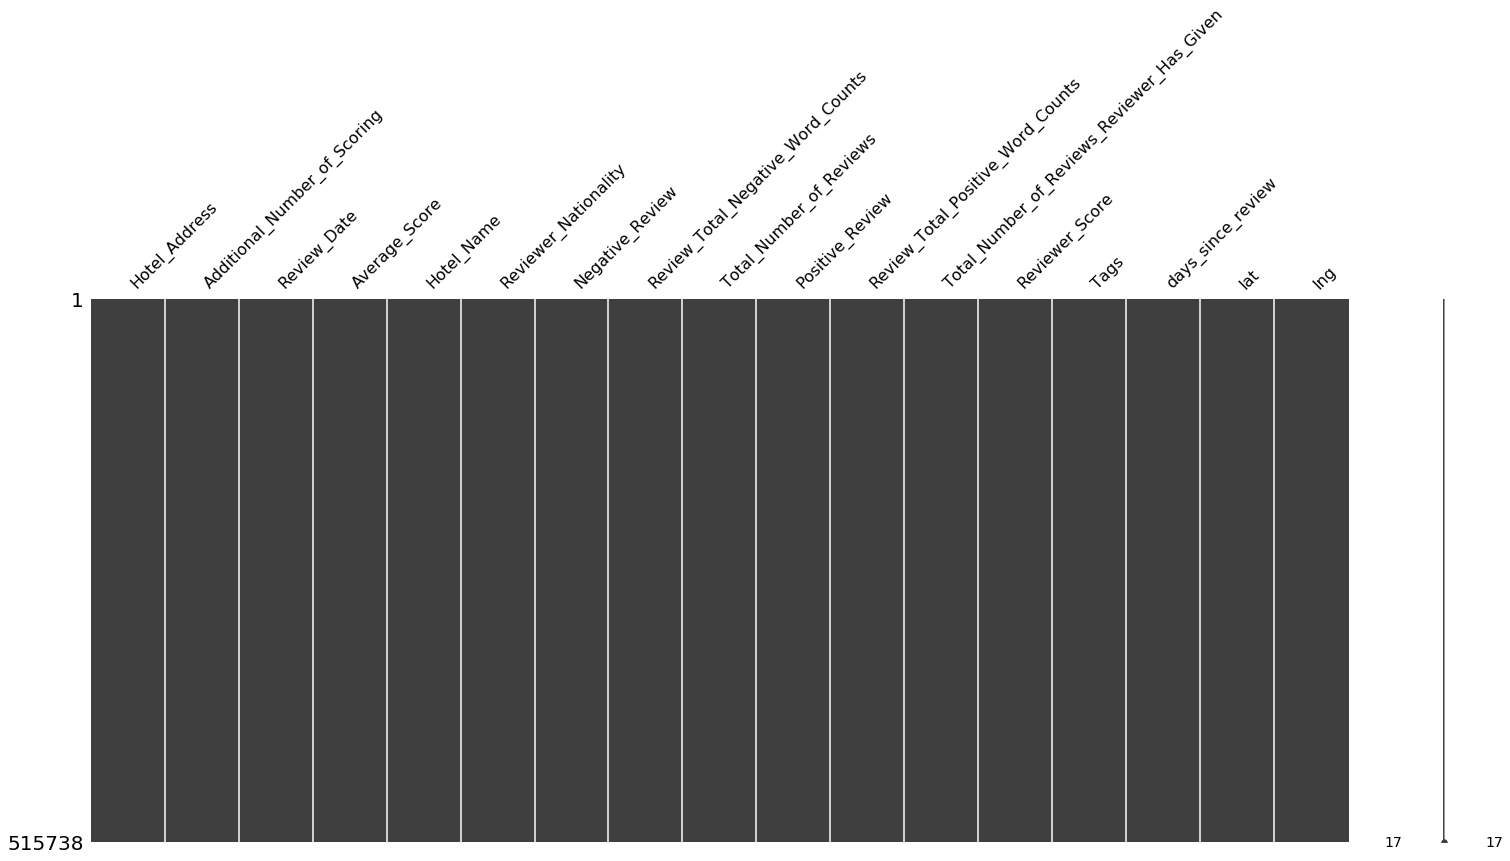

In [25]:
## Now all the missing are filled in the dataset.
msno.matrix(df)

In [26]:
#saving the data to pickle files
df.to_pickle('After_filling_Nans')

In [27]:
#loading the data from the pickle file
df = pd.read_pickle('After_filling_Nans')

###  Let's plot interactive map visualitation inorder to see where the Hotels are located.
* we are using the beautiful map visualization library called folium. (if you want to know more about folium library check out this link    https://media.readthedocs.org/pdf/folium/latest/folium.pdf )

In [28]:
#slicing the dataframe inorder to plot the locations(unique hotels information)
temp_df = df.drop_duplicates(['Hotel_Name'])
len(temp_df)

1492

In [29]:
map_osm = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )

temp_df.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(map_osm), axis=1)

map_osm

**Observations:**
* From the map we can see all the 1492 Hotels are located in 6 cities (Bercelona, Paris, Milan, Vienna, London, Amsterdam).         

# ** Preprocessing:**

Sice the text data is  clean, since the dataset has already removed the  unicode and punctuation in the text data and transform text into lower case..

In [30]:
pos_reviews = df['Positive_Review'].values
pos_reviews = pos_reviews.tolist()
neg_reviews = df['Negative_Review'].values
neg_reviews = neg_reviews.tolist()

In [31]:
text = pos_reviews+neg_reviews
text[0]

' Only the park outside of the hotel was beautiful '

In [32]:
score = ['positive' for i in range(len(pos_reviews))]
score += ['negative' for i in range(len(neg_reviews))]
len(score)

1031476

In [33]:
text_df = pd.DataFrame()
text_df['reviews'] = text
text_df['score'] = score
text_df.head()

,reviews,score
0,Only the park outside of the hotel was beauti...,positive
1,No real complaints the hotel was great great ...,positive
2,Location was good and staff were ok It is cut...,positive
3,Great location in nice surroundings the bar a...,positive
4,Amazing location and building Romantic setting,positive


In [34]:
text = text_df['reviews'].values

print(text[510])
stop = set(stopwords.words('english'))
words = []

summary = []
print("Removing stop words...........................")
for i in range(0,len(text)):
    if type(text[i]) == type('') :
        text[i] = text[i].lower()
        sentence = text[i]
        #Remove non-letters
        sentence = re.sub("[^a-zA-Z]"," ", sentence)
        buffer_sentence = [i for i in sentence.split() if i not in stop]
        word = ''
        
        for j in buffer_sentence:
            if len(j) >= 2:
                word +=' '+j
        summary.append(word)
print(summary[510])

porter = PorterStemmer()    
print("performing stemming............................")
for i in range(0,len(summary)):
    summary[i] = porter.stem(summary[i])
print(summary[510])

 This hotel was a great value near the tube station in Earl s Court It was one of the few places in London that offered three twin beds in one room which was perfect for us since we were traveling with our daughter It was very clean and charming with comfortable beds and in a lovely quiet neighborhood proximate to transportation to everything There was a nice little lounge bar in the lobby that we stopped into every night after our touring 
Removing stop words...........................
 hotel great value near tube station earl court one places london offered three twin beds one room perfect us since traveling daughter clean charming comfortable beds lovely quiet neighborhood proximate transportation everything nice little lounge bar lobby stopped every night touring
performing stemming............................
 hotel great value near tube station earl court one places london offered three twin beds one room perfect us since traveling daughter clean charming comfortable beds lovely 

In [35]:
summary = np.array(summary)
score = text_df['score'].values

## Featurizer - Bag of words
## Models - SVM , Logistic regression, Naive bayes

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_features = 200000)
corpa = vec.fit_transform(summary)
vocab = vec.get_feature_names()

for i in range(0,len(score)):
    if score[i] == 'positive':
        score[i] = 1
    else:
        score[i] = 0

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
features = [i for i in range(10000,130000,10000)]
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    
    best_params.append(clf.best_params_)
    vec = 0
    data = 0
    

#Best features at max_words = 3000
acc

##Confusion matrix
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []

vec = CountVectorizer(max_features = 3000)
data = vec.fit_transform(summary)

clf = MultinomialNB()
x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

#Logistic regression
best_params_logreg = []
parameters = {'loss' :['log'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
 
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_logreg.append(clf.best_params_)
print(best_params_logreg)

clf = SGDClassifier(loss = 'log',penalty = 'l2',alpha = 0.1, n_jobs = -1)
#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_log_ref = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n",conf_log_ref)
#ROC for a given hyperparameters for logistic regression
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Logistic regression is:",a)

#print confusion matrix
show_confusion_matrix(conf_log_ref,['Negative','Positive'])

#Precision and recall
tn = conf_log_ref[0,0]; fp = conf_log_ref[0,1]; fn = conf_log_ref[1,0]; tp = conf_log_ref[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_log_ref[0][0]
tn = conf_log_ref[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

#SVM
best_params_SVM = []
parameters = {'loss' :['hinge'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
 
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_SVM = clf.best_params_
print("Best hyperparameters for linear SVM:",best_params_SVM)

#Linear SVM
from sklearn import svm
clf = SGDClassifier(penalty = 'l2', alpha = 0.1, n_jobs =  -1, loss = 'hinge')

#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_SVM_ref = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n",conf_SVM_ref)

#print confusion matrix
show_confusion_matrix(conf_SVM_ref,['Negative','Positive'])

#Precision and recall
tn = conf_SVM_ref[0,0]; fp = conf_SVM_ref[0,1]; fn = conf_SVM_ref[1,0]; tp = conf_SVM_ref[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_SVM_ref[0][0]
tn = conf_SVM_ref[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))